In [36]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

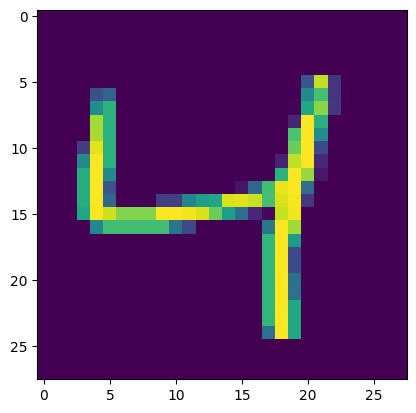

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [22]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [25]:
# Train the model with early stopping
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    callbacks=[early_stopping])

Epoch 1/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8429 - loss: 0.5394 - val_accuracy: 0.9523 - val_loss: 0.1715
Epoch 2/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9565 - loss: 0.1477 - val_accuracy: 0.9664 - val_loss: 0.1212
Epoch 3/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9697 - loss: 0.0995 - val_accuracy: 0.9692 - val_loss: 0.1018
Epoch 4/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9785 - loss: 0.0711 - val_accuracy: 0.9705 - val_loss: 0.1000
Epoch 5/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9850 - loss: 0.0506 - val_accuracy: 0.9712 - val_loss: 0.0967
Epoch 6/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9869 - loss: 0.0394 - val_accuracy: 0.9725 - val_loss: 0.0968
Epoch 7/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9898 - loss: 0.0319 - val_accuracy: 0.9732 - val_loss: 0.0973
Epoch 8/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9909 - loss

In [26]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [29]:
y_prob[0]

array([2.9317213e-09, 1.4578279e-08, 5.8173231e-07, 5.1078086e-07,
       3.1944763e-11, 2.0609844e-10, 1.0086008e-12, 9.9999851e-01,
       7.7824032e-11, 3.8943074e-07], dtype=float32)

In [30]:
y_pred = y_prob.argmax(axis=1)

In [31]:
y_pred[0]

np.int64(7)

In [34]:
# Convert one-hot encoded y_test to class labels
y_test_labels = y_test.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9713
